Python Programlama ve Veri Görselleştirme Temelleri

In [ ]:
#ortam kontrolü
import sys
print(sys.executable)


c:\Users\Kocael\.conda\envs\veri_env\python.exe


In [3]:
students = [
    {"name": "Rabia", "vize": 78, "final": 92, "proje": 85},
    {"name": "Ahmet", "vize": 45, "final": 55, "proje": 60},
    {"name": "Zeynep", "vize": 90, "final": 88, "proje": 95},
    {"name": "Mehmet", "vize": 60, "final": 40, "proje": 70},
]

def calculate_grade(student: dict) -> float:
    # ağırlıklı ortalama
    return student["vize"] * 0.3 + student["final"] * 0.5 + student["proje"] * 0.2

for s in students:
    grade = calculate_grade(s)
    status = "Geçti" if grade >= 60 else "Kaldı"
    print(f"{s['name']:8} -> grade={grade:.2f} | {status}")


#List içinde dict var  alculate_grade fonksiyonu ile işlem yapılıyor
#if yapısı ile karar veriliyor geçti ya da kaldı çıktı olarak veriliyor


Rabia    -> grade=86.40 | Geçti
Ahmet    -> grade=53.00 | Kaldı
Zeynep   -> grade=90.00 | Geçti
Mehmet   -> grade=52.00 | Kaldı


In [ ]:
"""
Mini Proje: Öğrenci Not Takip ve Analiz Sistemi


Özellikler:
- Öğrenci ekleme (hata kontrolü ile)
- Not ortalaması hesaplama (ağırlıklı)
- Geçti/Kaldı durumu belirleme
- Sınıf raporu oluşturma
- En başarılı öğrenciyi bulma
"""

ogrenciler = [
    {"id": 1, "ad": "Rabia", "vize": 78, "final": 92, "proje": 85},
    {"id": 2, "ad": "Ahmet", "vize": 45, "final": 55, "proje": 60},
    {"id": 3, "ad": "Zeynep", "vize": 90, "final": 88, "proje": 95},
    {"id": 4, "ad": "Mehmet", "vize": 60, "final": 40, "proje": 70},
]


# Fonksiyonlar 

def not_kontrol(not_degeri: int) -> None:
    """
    Girilen notun 0-100 aralığında olup olmadığını kontrol eder.
    Hatalıysa ValueError fırlatır.
    """
    if not isinstance(not_degeri, int):
        raise TypeError("Not değeri tam sayı (int) olmalıdır.")

    if not 0 <= not_degeri <= 100:
        raise ValueError("Not değeri 0 ile 100 arasında olmalıdır.")


def ortalama_hesapla(ogrenci: dict) -> float:

    return (
        ogrenci["vize"] * 0.30
        + ogrenci["final"] * 0.50
        + ogrenci["proje"] * 0.20
    )


def durum_belirle(ortalama: float, gecme_notu: float = 60.0) -> str:
    
    return "GEÇTİ" if ortalama >= gecme_notu else "KALDI"



# Class: Sistemin kendisi

class OgrenciSistemi:
    """
    Öğrencileri yöneten ve analiz eden sınıf.
    """

    def __init__(self, ogrenci_listesi: list[dict]):
        self.ogrenci_listesi = ogrenci_listesi

    def ogrenci_ekle(self, ad: str, vize: int, final: int, proje: int) -> None:
        """
        Yeni öğrenci ekler.
        Not girişlerinde hata varsa try-except ile yakalar.
        """
        try:
            not_kontrol(vize)
            not_kontrol(final)
            not_kontrol(proje)

            yeni_id = (
                max(o["id"] for o in self.ogrenci_listesi) + 1
                if self.ogrenci_listesi
                else 1
            )

            yeni_ogrenci = {
                "id": yeni_id,
                "ad": ad,
                "vize": vize,
                "final": final,
                "proje": proje,
            }

            self.ogrenci_listesi.append(yeni_ogrenci)
            print(f" Öğrenci eklendi: {ad} (ID: {yeni_id})")

        except (ValueError, TypeError) as hata:
            print(f" Öğrenci eklenemedi: {hata}")

    def rapor_olustur(self) -> list[dict]:
        """
        Her öğrenci için ortalama ve durum bilgisi içeren rapor listesi üretir.
        """
        rapor = []

        for ogrenci in self.ogrenci_listesi:
            ort = ortalama_hesapla(ogrenci)
            durum = durum_belirle(ort)

            rapor.append(
                {
                    "id": ogrenci["id"],
                    "ad": ogrenci["ad"],
                    "ortalama": round(ort, 2),
                    "durum": durum,
                }
            )

        return rapor

    def rapor_yazdir(self) -> None:
        """
        Raporu okunabilir şekilde ekrana yazdırır.
        """
        rapor = self.rapor_olustur()

        print("\n" + "-" * 40)
        print(" ÖĞRENCİ RAPORU")
        print("-" * 40)

        for kayit in rapor:
            print(
                f"#{kayit['id']:02} | {kayit['ad']:<10} | "
                f"Ortalama: {kayit['ortalama']:<6} | Durum: {kayit['durum']}"
            )

    def en_basarili_ogrenci(self) -> dict | None:
        """
        Ortalama notu en yüksek öğrenciyi döndürür.
        """
        rapor = self.rapor_olustur()

        if not rapor:
            return None

        return max(rapor, key=lambda x: x["ortalama"])
    #filtreleme yapılıyor



# Programın çalıştırılması (for-if + try-except test)

sistem = OgrenciSistemi(ogrenciler)

# İlk rapor
sistem.rapor_yazdir()

# Hatalı ekleme denemesi (try-except göstermek için)
sistem.ogrenci_ekle(ad="Elif", vize=110, final=70, proje=80)

# Doğru ekleme
sistem.ogrenci_ekle(ad="Elif", vize=85, final=70, proje=80)

# Güncel rapor
sistem.rapor_yazdir()

# En başarılı öğrenci
en_iyi = sistem.en_basarili_ogrenci()
if en_iyi:
    print("\n🏆 EN BAŞARILI ÖĞRENCİ")
    print(en_iyi)





----------------------------------------
 ÖĞRENCİ RAPORU
----------------------------------------
#01 | Rabia      | Ortalama: 86.4   | Durum: GEÇTİ
#02 | Ahmet      | Ortalama: 53.0   | Durum: KALDI
#03 | Zeynep     | Ortalama: 90.0   | Durum: GEÇTİ
#04 | Mehmet     | Ortalama: 52.0   | Durum: KALDI
 Öğrenci eklenemedi: Not değeri 0 ile 100 arasında olmalıdır.
 Öğrenci eklendi: Elif (ID: 5)

----------------------------------------
 ÖĞRENCİ RAPORU
----------------------------------------
#01 | Rabia      | Ortalama: 86.4   | Durum: GEÇTİ
#02 | Ahmet      | Ortalama: 53.0   | Durum: KALDI
#03 | Zeynep     | Ortalama: 90.0   | Durum: GEÇTİ
#04 | Mehmet     | Ortalama: 52.0   | Durum: KALDI
#05 | Elif       | Ortalama: 76.5   | Durum: GEÇTİ

🏆 EN BAŞARILI ÖĞRENCİ
{'id': 3, 'ad': 'Zeynep', 'ortalama': 90.0, 'durum': 'GEÇTİ'}


NumPy ile 2D-3D matris üzerinden görüntü temsilini anlamak.


In [ ]:
pip install matplotlib


In [7]:
import matplotlib
import matplotlib.pyplot as plt

print("Matplotlib sürüm:", matplotlib.__version__)


Matplotlib sürüm: 3.10.8


Shape: (4, 10)
Dtype: uint8
[[  0  30  60  90 120 150 180 210 240 255]
 [ 10  40  70 100 130 160 190 220 245 250]
 [ 20  50  80 110 140 170 200 230 235 240]
 [ 25  55  85 115 145 175 205 215 225 230]]


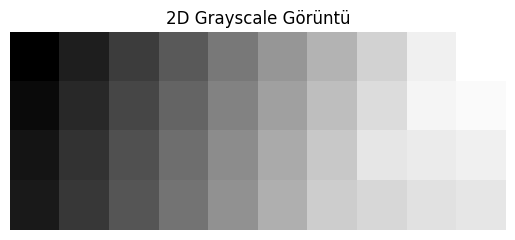

In [ ]:
gri_goruntu = np.array(
    [
        [0, 30, 60, 90, 120, 150, 180, 210, 240, 255],
        [10, 40, 70, 100, 130, 160, 190, 220, 245, 250],
        [20, 50, 80, 110, 140, 170, 200, 230, 235, 240],
        [25, 55, 85, 115, 145, 175, 205, 215, 225, 230],
    ],
    dtype=np.uint8
)

print("Shape:", gri_goruntu.shape)#görüntü boyutu satır ve sütun
print("Dtype:", gri_goruntu.dtype)#piksel değerleri 0-255 
print(gri_goruntu)

plt.imshow(gri_goruntu, cmap="gray")
plt.title("2D Grayscale Görüntü")
plt.axis("off")
plt.show()


Shape: (120, 180, 3)
Dtype: uint8


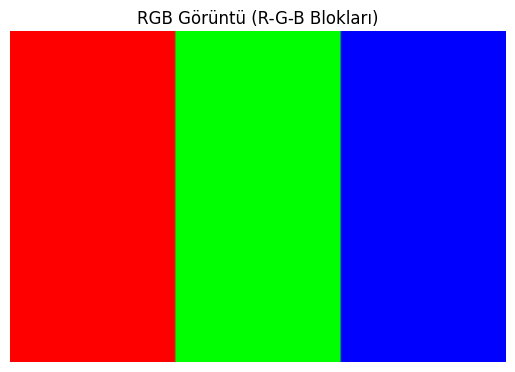

In [ ]:
#120 satır → 120 piksel yükseklik 180 sütun → 180 piksel genişlik
#3 kanal → her pikselin 3 değeri var: R, G, B

h, w = 120, 180
rgb_goruntu = np.zeros((h, w, 3), dtype=np.uint8)

print("Shape:", rgb_goruntu.shape)
print("Dtype:", rgb_goruntu.dtype)

# Sol bölge: kırmızı
#Görüntünün sol 1/3’lük kısmının KIRMIZI kanalını 255 yap.
rgb_goruntu[:, :w//3, 0] = 255

# Orta bölge: yeşil
rgb_goruntu[:, w//3:2*w//3, 1] = 255

# Sağ bölge: mavi
rgb_goruntu[:, 2*w//3:, 2] = 255

plt.imshow(rgb_goruntu)
plt.title("RGB Görüntü (R-G-B Blokları)")
plt.axis("off")
plt.show()



Pandas ile tablo görüntüsü, missing data analizi, histogram oluşturma.

In [ ]:
import sys
!{sys.executable} -m pip install pandas


In [ ]:
import sys
!{sys.executable} -m pip install seaborn


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

veri = {
    "ogrenci_id": [1, 2, 3, 4, 5, 6],
    "ad": ["Rabia", "Ahmet", "Zeynep", "Mehmet", "Elif", "Can"],
    "yas": [19, 20, np.nan, 21, 20, np.nan],
    "vize": [78, 45, 90, 60, 85, 70],
    "final": [92, 55, 88, np.nan, 70, 65],
    "proje": [85, 60, np.nan, 70, 80, 75],
}

df = pd.DataFrame(veri)
df

print("Boyut (satır, sütun):", df.shape)
print("\nSütun isimleri:", df.columns.tolist())
print("\nVeri tipleri:\n", df.dtypes)


eksik_sayisi = df.isnull().sum()
print("Eksik veri sayısı:\n", eksik_sayisi)


df[df.isnull().any(axis=1)]


Boyut (satır, sütun): (6, 6)

Sütun isimleri: ['ogrenci_id', 'ad', 'yas', 'vize', 'final', 'proje']

Veri tipleri:
 ogrenci_id      int64
ad             object
yas           float64
vize            int64
final         float64
proje         float64
dtype: object
Eksik veri sayısı:
 ogrenci_id    0
ad            0
yas           2
vize          0
final         1
proje         1
dtype: int64


,ogrenci_id,ad,yas,vize,final,proje
2,3,Zeynep,NaN,90,88.0,NaN
3,4,Mehmet,21.0,60,NaN,70.0
5,6,Can,NaN,70,65.0,75.0


In [15]:
df_silinmis = df.dropna()
df_silinmis


,ogrenci_id,ad,yas,vize,final,proje
0,1,Rabia,19.0,78,92.0,85.0
1,2,Ahmet,20.0,45,55.0,60.0
4,5,Elif,20.0,85,70.0,80.0


In [16]:
df_doldurulmus = df.copy()

df_doldurulmus["yas"] = df_doldurulmus["yas"].fillna(df_doldurulmus["yas"].median())
df_doldurulmus["final"] = df_doldurulmus["final"].fillna(df_doldurulmus["final"].mean())
df_doldurulmus["proje"] = df_doldurulmus["proje"].fillna(df_doldurulmus["proje"].mean())

df_doldurulmus


,ogrenci_id,ad,yas,vize,final,proje
0,1,Rabia,19.0,78,92.0,85.0
1,2,Ahmet,20.0,45,55.0,60.0
2,3,Zeynep,20.0,90,88.0,74.0
3,4,Mehmet,21.0,60,74.0,70.0
4,5,Elif,20.0,85,70.0,80.0
5,6,Can,20.0,70,65.0,75.0


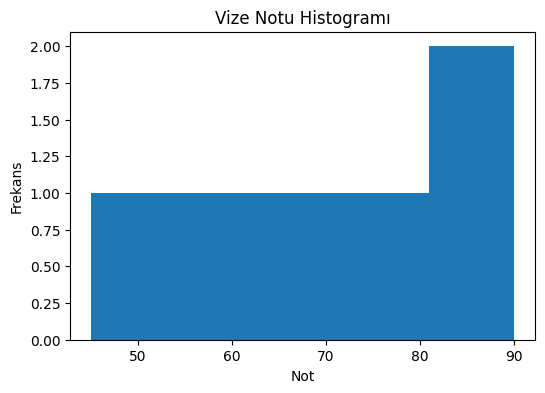

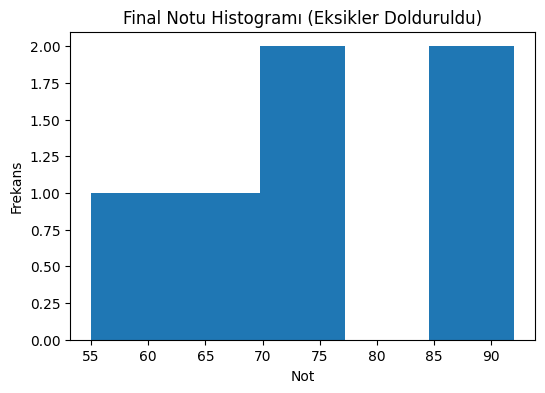

In [17]:
plt.figure(figsize=(6, 4))
plt.hist(df["vize"], bins=5)
plt.title("Vize Notu Histogramı")
plt.xlabel("Not")
plt.ylabel("Frekans")
plt.show()



plt.figure(figsize=(6, 4))
plt.hist(df_doldurulmus["final"], bins=5)
plt.title("Final Notu Histogramı (Eksikler Dolduruldu)")
plt.xlabel("Not")
plt.ylabel("Frekans")
plt.show()


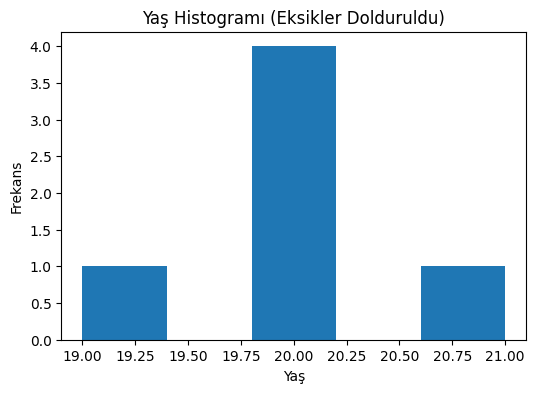

In [18]:
plt.figure(figsize=(6, 4))
plt.hist(df_doldurulmus["yas"], bins=5)
plt.title("Yaş Histogramı (Eksikler Dolduruldu)")
plt.xlabel("Yaş")
plt.ylabel("Frekans")
plt.show()


Matplotlib ve Seaborn ile RGB kanal bazlı histogram, heatmap, scatter, boxplot gibi veri görüselleri.

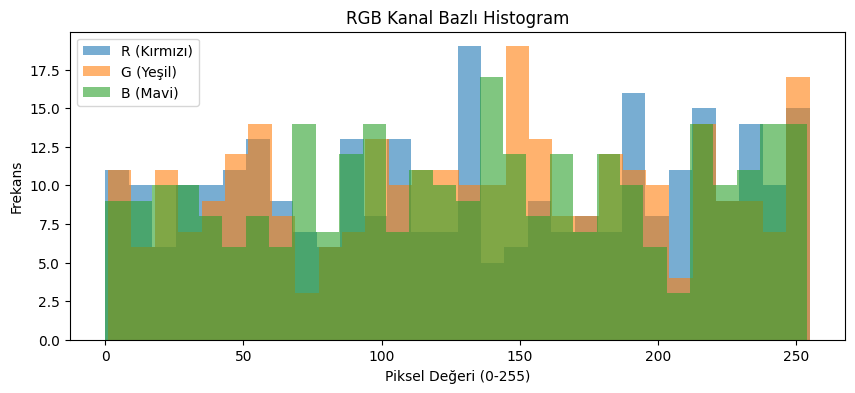

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

n = 300  # örnek sayısı

df = pd.DataFrame({
    "R": np.random.randint(0, 256, n),
    "G": np.random.randint(0, 256, n),
    "B": np.random.randint(0, 256, n),
    "parlaklik": np.random.normal(130, 35, n).clip(0, 255),
    "kontrast": np.random.normal(60, 20, n).clip(0, 120),
    "etiket": np.random.choice(["dogal", "yapay", "gece"], size=n, p=[0.45, 0.35, 0.20])
})

df.head()


plt.figure(figsize=(10, 4))

plt.hist(df["R"], bins=30, alpha=0.6, label="R (Kırmızı)")
plt.hist(df["G"], bins=30, alpha=0.6, label="G (Yeşil)")
plt.hist(df["B"], bins=30, alpha=0.6, label="B (Mavi)")

plt.title("RGB Kanal Bazlı Histogram")
plt.xlabel("Piksel Değeri (0-255)")
plt.ylabel("Frekans")
plt.legend()
plt.show()





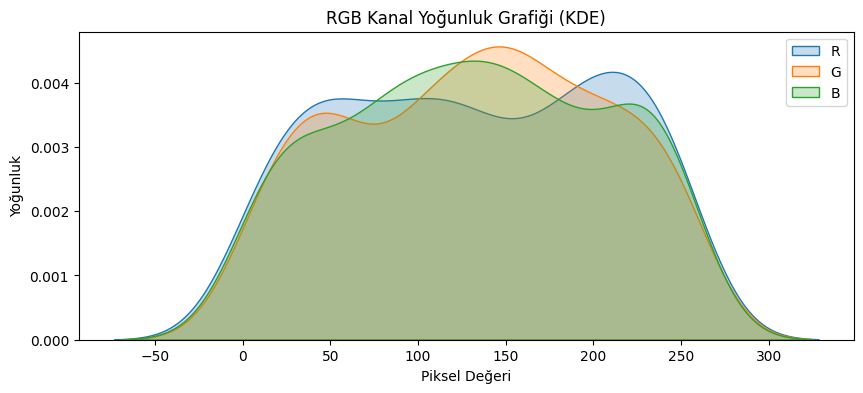

In [20]:
plt.figure(figsize=(10, 4))
sns.kdeplot(df["R"], label="R", fill=True)
sns.kdeplot(df["G"], label="G", fill=True)
sns.kdeplot(df["B"], label="B", fill=True)

plt.title("RGB Kanal Yoğunluk Grafiği (KDE)")
plt.xlabel("Piksel Değeri")
plt.ylabel("Yoğunluk")
plt.legend()
plt.show()


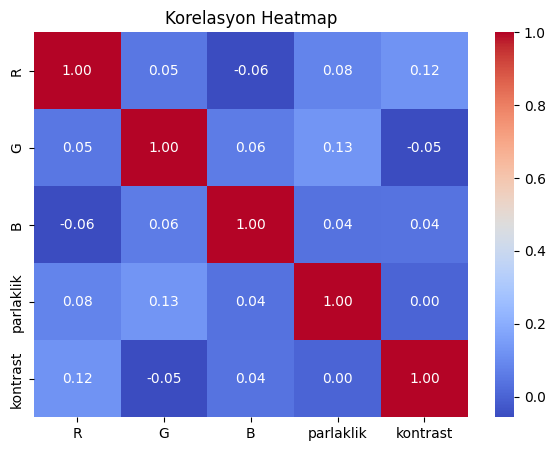

In [21]:
sayisal_df = df[["R", "G", "B", "parlaklik", "kontrast"]]
korelasyon = sayisal_df.corr()

plt.figure(figsize=(7, 5))
sns.heatmap(korelasyon, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasyon Heatmap")
plt.show()


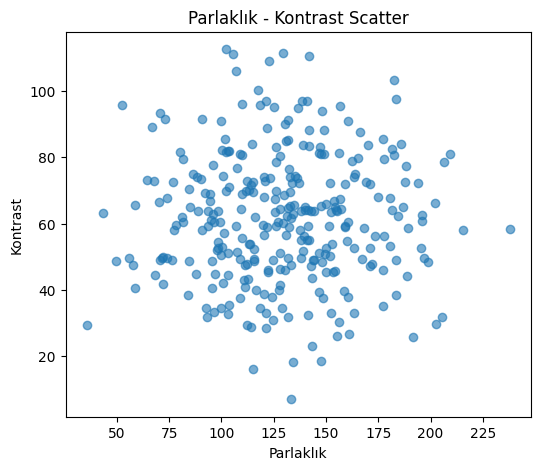

In [22]:
plt.figure(figsize=(6, 5))
plt.scatter(df["parlaklik"], df["kontrast"], alpha=0.6)

plt.title("Parlaklık - Kontrast Scatter")
plt.xlabel("Parlaklık")
plt.ylabel("Kontrast")
plt.show()


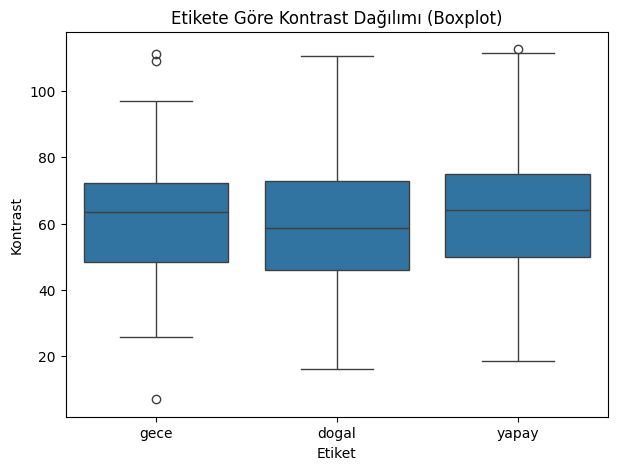

In [23]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="etiket", y="kontrast")

plt.title("Etikete Göre Kontrast Dağılımı (Boxplot)")
plt.xlabel("Etiket")
plt.ylabel("Kontrast")
plt.show()


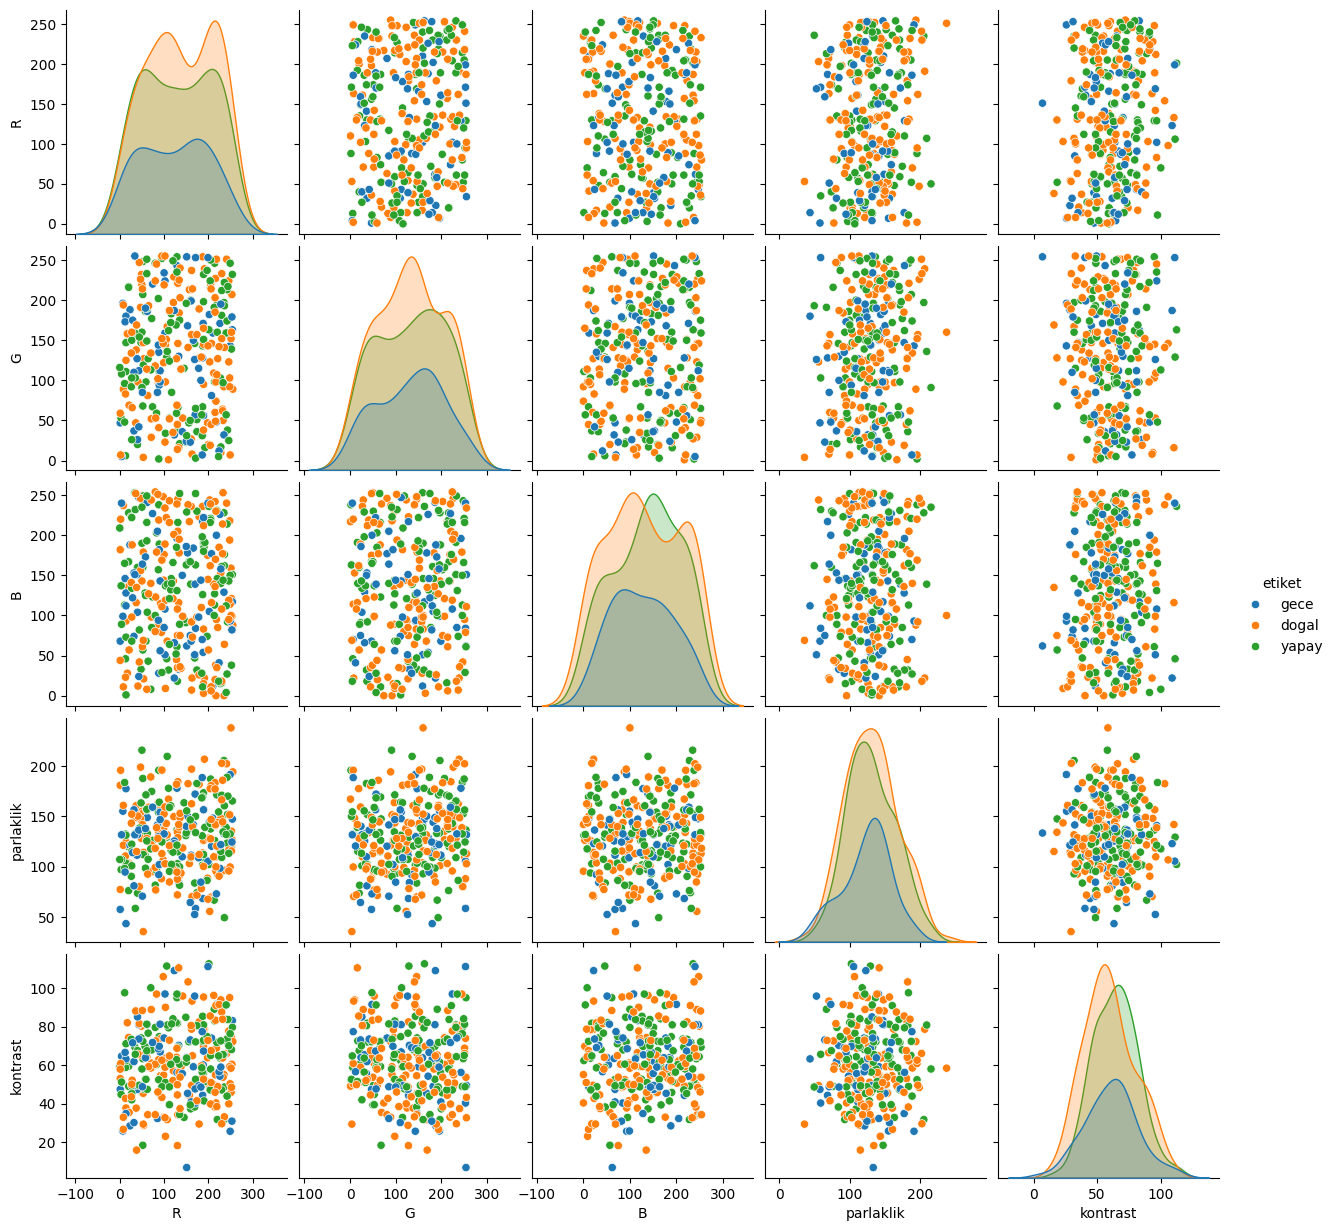

In [24]:
sns.pairplot(df[["R", "G", "B", "parlaklik", "kontrast", "etiket"]], hue="etiket")
plt.show()


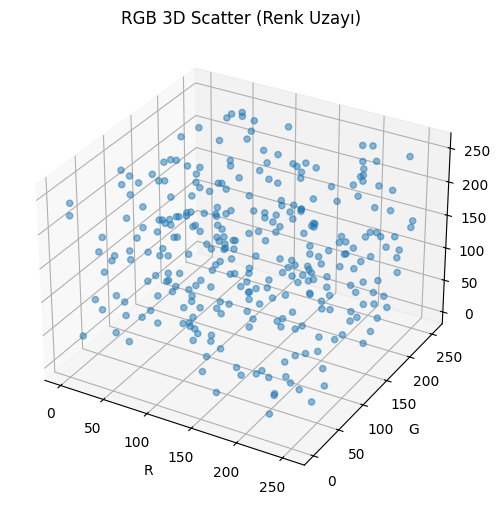

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(df["R"], df["G"], df["B"], alpha=0.5)

ax.set_title("RGB 3D Scatter (Renk Uzayı)")
ax.set_xlabel("R")
ax.set_ylabel("G")
ax.set_zlabel("B")
plt.show()


OpenCV kullanarak RGB ve Grayscale dönüşüm, çözünürlük değişimi, kesme, resize, rotate işlemleri.

Resim başarıyla okundu!
BGR shape: (1024, 768, 3)


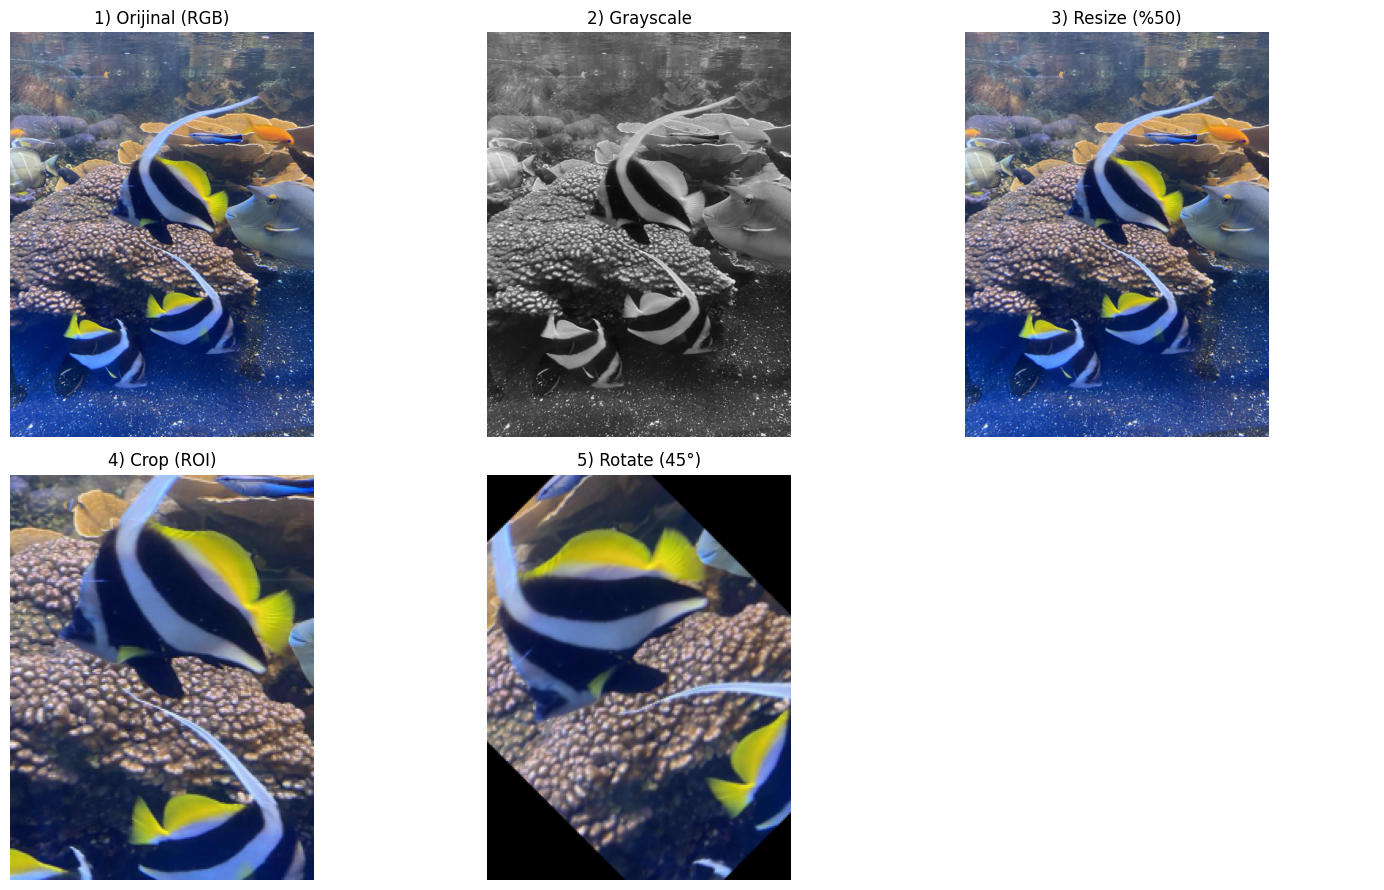

Çıktılar kaydedildi: orijinal.png, grayscale.png, resize.png, crop.png, rotate_45.png


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1) Görseli oku
resim_yolu = r"C:\Users\Kocael\Desktop\tarvina_yazilim_projects\veri_gorsellestirme_temelleri\IMG_2395_jpeg_jpg.rf.9f1503ad3b7a7c7938daed057cc4e9bc.jpg"
bgr = cv2.imread(resim_yolu)

if bgr is None:
    raise FileNotFoundError("Resim okunamadı! Dosya yolunu kontrol et.")

print("Resim başarıyla okundu!")
print("BGR shape:", bgr.shape)

# 2) BGR -> RGB 
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

# 3) RGB -> Grayscale
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

# 4) Resize (çözünürlüğü küçültme: %50)
h, w = bgr.shape[:2]
yeni_w = int(w * 0.5)
yeni_h = int(h * 0.5)

bgr_resize = cv2.resize(bgr, (yeni_w, yeni_h), interpolation=cv2.INTER_AREA)
rgb_resize = cv2.cvtColor(bgr_resize, cv2.COLOR_BGR2RGB)

# 5) Crop (ortadan kesme ROI)
h2, w2 = bgr_resize.shape[:2]
x1, y1 = w2 // 4, h2 // 4
x2, y2 = 3 * w2 // 4, 3 * h2 // 4

crop_bgr = bgr_resize[y1:y2, x1:x2]
crop_rgb = cv2.cvtColor(crop_bgr, cv2.COLOR_BGR2RGB)

# 6) Rotate (45 derece)
hc, wc = crop_bgr.shape[:2]
merkez = (wc // 2, hc // 2)
M = cv2.getRotationMatrix2D(merkez, 45, 1.0)
rot_45 = cv2.warpAffine(crop_bgr, M, (wc, hc))
rot_45_rgb = cv2.cvtColor(rot_45, cv2.COLOR_BGR2RGB)

# 7) Hepsini sırayla görselleştirmek için 
fig, axes = plt.subplots(2, 3, figsize=(15, 9))

axes[0, 0].imshow(rgb)
axes[0, 0].set_title("1) Orijinal (RGB)")

axes[0, 1].imshow(gray, cmap="gray")
axes[0, 1].set_title("2) Grayscale")

axes[0, 2].imshow(rgb_resize)
axes[0, 2].set_title("3) Resize (%50)")

axes[1, 0].imshow(crop_rgb)
axes[1, 0].set_title("4) Crop (ROI)")

axes[1, 1].imshow(rot_45_rgb)
axes[1, 1].set_title("5) Rotate (45°)")

axes[1, 2].axis("off")
axes[1, 2].set_title("")

for ax in axes.flat:
    ax.axis("off")

plt.tight_layout()
plt.show()

# 8) Kaydetmek için
cv2.imwrite("orijinal.png", bgr)
cv2.imwrite("grayscale.png", gray)
cv2.imwrite("resize.png", bgr_resize)
cv2.imwrite("crop.png", crop_bgr)
cv2.imwrite("rotate_45.png", rot_45)

print("Çıktılar kaydedildi: orijinal.png, grayscale.png, resize.png, crop.png, rotate_45.png")
